In [1]:
from sklearn.datasets import load_breast_cancer # 유방암 데이터
from sklearn.model_selection import train_test_split

try:
    import mglearn
except ModuleNotFoundError as e:
    import sys
    !{sys.executable} -m pip install mglearn
    import mglearn

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

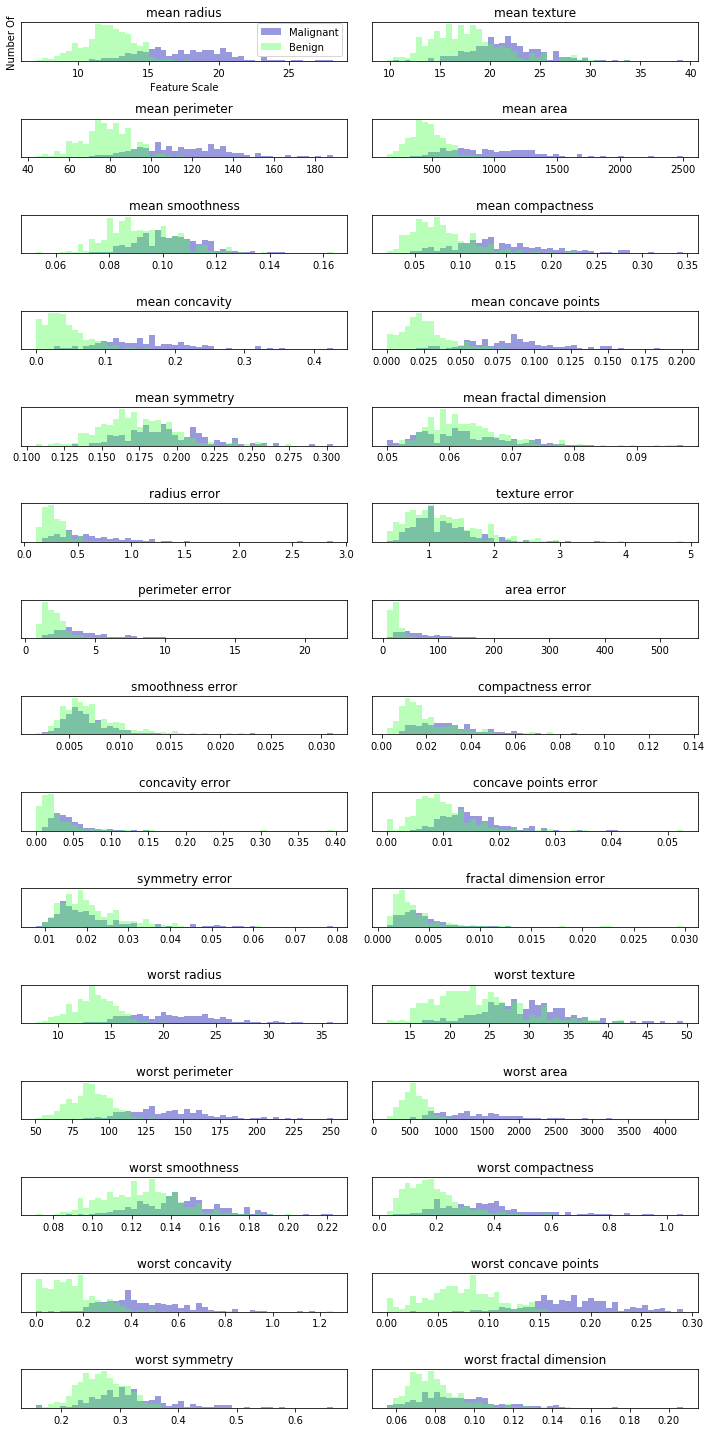

In [2]:
# 히스토그램 그리기
fig, axes = plt.subplots(15,2, figsize=(10, 20))
# fig = figure ==> 그림 그릴 영역(도화지), # axes = ax ==> 쪼개진 각 plot에 대한 정보.

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel() 
# <nd_array>.ravel(): Return a contiguous flattened array.

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.4)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.4)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks([])

ax[0].set_xlabel('Feature Scale')
ax[0].set_ylabel("Number Of")
ax[0].legend(['Malignant', 'Benign'], loc='best')
fig.tight_layout()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)
X_scaled[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

In [4]:

# PCA 변환 학습 및 적용.
# 1. PCA 객체 생성
# 2. 주성분 찾기
# 3. 데이터 회전 및 차원 축소

In [5]:
# X_scaled (표준화된 X)
#### [순서] ####
# 1. 공분산 행렬(covariance Matrix) 만들기
# 2. 공분산 행렬의 Eigen Value와 Eigen Vector 확인하기
# 3. Eigen Value가 높은 것 -> 주성분으로 설정하기
# 4. 주성분에 projection하기
# 5. 주성분 산점도 그리기
X_scaled.shape

(569, 30)

In [6]:

# 1. 공분산 행렬 만들기
# np.cov(m, **kwargs) ==> m: 행렬(행: 변수, 열: 관측치)
X_scaled_T = X_scaled.T
print('X_scaled_T shape: ', X_scaled_T.shape)
cov_matrix = np.cov(X_scaled_T)

# 공분산 행렬 (Covariance Matrix)
print('공분산행렬 Shape: ', cov_matrix.shape)
# 각 항(0,0), (1,1), (2,2)들이 1
cov_matrix[0], cov_matrix[1], cov_matrix[2]

X_scaled_T shape:  (30, 569)
공분산행렬 Shape:  (30, 30)


(array([ 1.00176056,  0.32435193,  0.99961207,  0.98909547,  0.17088151,
         0.50701464,  0.67795504,  0.82397664,  0.14800135, -0.31217947,
         0.68028597, -0.09748878,  0.67535854,  0.7371592 , -0.22299203,
         0.20636266,  0.19454553,  0.37683123, -0.10450454, -0.04271634,
         0.97124591,  0.29753054,  0.9668357 ,  0.94273929,  0.11982673,
         0.41419075,  0.52783912,  0.74552443,  0.16424199,  0.00707833]),
 array([ 0.32435193,  1.00176056,  0.33011322,  0.32165099, -0.02342969,
         0.23711895,  0.30295025,  0.29398071,  0.07152669, -0.07657176,
         0.27635436,  0.38703783,  0.28216902,  0.26030246,  0.00662542,
         0.19231259,  0.14354535,  0.1641395 ,  0.00914324,  0.0545534 ,
         0.35319367,  0.9136503 ,  0.35866993,  0.34415078,  0.07763981,
         0.27831873,  0.3015552 ,  0.29583577,  0.10519278,  0.11941522]),
 array([ 0.99961207,  0.33011322,  1.00176056,  0.98824361,  0.20764309,
         0.55791673,  0.71739645,  0.85247524, 